## Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#pd.set_option('display.max_colwidth',1000)

 ## Uploading files

In [4]:
from google.colab import files
uploaded = files.upload()

Saving gdp-vs-happiness.csv to gdp-vs-happiness.csv


## GDP VS Life expectancy

In [5]:
import io 
# getting data
df = pd.read_csv(io.BytesIO(uploaded['life-expectancy-vs-gdp-per-capita.csv']))
df.head()


KeyError: ignored

### Data cleaning

In [6]:
# Subsetting data from  year 2018
df_2018 = df[df['Year'] == 2018]

# checking NA's
df_2018.count()

#removing NA's
df_2018 = df_2018.dropna(subset =['Life expectancy','GDP per capita'])

# removing WORLD
df_2018 = df_2018[df_2018['Entity'] !='World']

# making Entity a caregorical variable
df_2018['Entity'] = df_2018['Entity'].astype('category')

# creating a new variable life^2/gdp
df_2018['life/gdp'] = df_2018['Life expectancy']**2/df_2018['GDP per capita']

In [7]:
# Creating categories for plotting 

df_2018['plot_category'] = 0


mean_gdp = np.mean(df_2018['GDP per capita'])
mean_life = np.mean(df_2018['Life expectancy'])

for i in df_2018.index:
  if(df_2018['GDP per capita'].loc[i] > mean_gdp and df_2018['Life expectancy'].loc[i] > mean_life):
    df_2018['plot_category'].loc[i] = 1
  if(df_2018['GDP per capita'].loc[i] < mean_gdp and df_2018['Life expectancy'].loc[i] < mean_life):
    df_2018['plot_category'].loc[i] = 2
  if(df_2018['GDP per capita'].loc[i] > mean_gdp and df_2018['Life expectancy'].loc[i] < mean_life):
    df_2018['plot_category'].loc[i] = 3
  if(df_2018['GDP per capita'].loc[i] < mean_gdp and df_2018['Life expectancy'].loc[i] > mean_life):
    df_2018['plot_category'].loc[i] = 4



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Scatter plot of GDP vs Life Expectancy

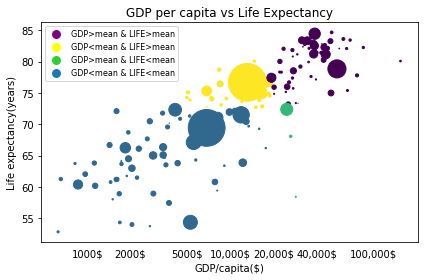

In [108]:
#Plotting

from matplotlib.lines import Line2D

country_size = df_2018['Total population (Gapminder, HYDE & UN)']/10**6

legend_elements = [Line2D([0], [0], marker='o', color='w', label='GDP>mean & LIFE>mean',markerfacecolor='purple', markersize=10,),
                   Line2D([0], [0], marker='o', color='w', label='GDP<mean & LIFE>mean',markerfacecolor='yellow', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='GDP>mean & LIFE<mean',markerfacecolor='limegreen', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='GDP<mean & LIFE<mean',markerfacecolor='C0', markersize=10)]

fig, ax = plt.subplots()
scatter = ax.scatter(df_2018['GDP per capita'], df_2018['Life expectancy'],c =df_2018['plot_category'], s = country_size)
ax.set_xscale('log')

ax.set_xticks([1000,2000,5000,10000,20000,40000,100000])
ax.set_xticklabels(['1000$','2000$','5000$','10,000$','20,000$','40,000$','100,000$'])
ax.xaxis.set_ticks_position('none')

ax.set_xlabel(r'GDP/capita($)', fontsize=10)
ax.set_ylabel(r'Life expectancy(years)', fontsize=10)
ax.set_title('GDP per capita vs Life Expectancy')

ax.legend(handles=legend_elements,fontsize = 8)
fig.tight_layout()

plt.show()



### Top Countries (High GDP, High Life Expectancy)

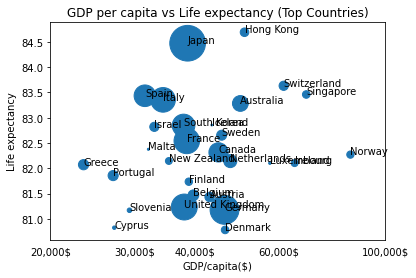

In [8]:
### SUMMARY STATISTICS

# mean life expectancy
mean_life = np.mean(df_2018['Life expectancy'])

# standard deviation
std_life = np.std(df_2018['Life expectancy'])

# mean gdp
mean_gdp = np.mean(df_2018['GDP per capita'])
std_gdp = np.std(df_2018['GDP per capita'])

#median gdp
median_gdp = np.median(df_2018['GDP per capita'])



# Plotting countries with a life expectancy one std above the mean
top_countries_life = df_2018[df_2018['Life expectancy'] > mean_life + std_life]
country_size = top_countries_life['Total population (Gapminder, HYDE & UN)']/10**5

fig, ax = plt.subplots()
scatter = ax.scatter(top_countries_life['GDP per capita'], top_countries_life['Life expectancy'],s = country_size)
ax.set_xscale('log')

for i in top_countries_life['Entity']:
  cnt = top_countries_life[top_countries_life['Entity'] == i]
  cnt_gdp = cnt['GDP per capita']
  cnt_life = cnt['Life expectancy']
  ax.annotate(i,(cnt_gdp,cnt_life))

ax.set_xticks([20000,30000,40000,60000,100000])
ax.set_xticklabels(['20,000$','30,000$','40,000$','60,000$','100,000$'])
ax.xaxis.set_ticks_position('none')
ax.set_xlabel(r'GDP/capita($)', fontsize=10)
ax.set_ylabel(r'Life expectancy', fontsize=10)
ax.set_title('GDP per capita vs Life expectancy (Top Countries)')


plt.show()

### Low GDP, High Life Expectancy

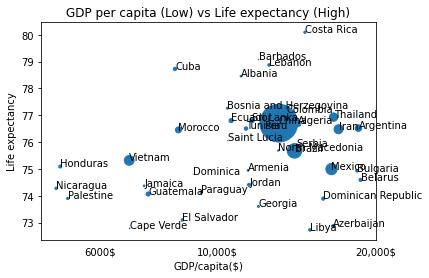

In [22]:
# countries with a life expectancy higher that the average and a gdp lower than the average 

low_gdp = df_2018[(df_2018['Life expectancy'] > mean_life) & (df_2018['GDP per capita'] < mean_gdp)]

low_gdp = low_gdp.sort_values(by = 'Life expectancy',ascending = False)

country_size = low_gdp['Total population (Gapminder, HYDE & UN)']/10**6

fig, ax = plt.subplots()
scatter = ax.scatter(low_gdp['GDP per capita'], low_gdp['Life expectancy'],s = country_size)
ax.set_xscale('log')

for i in low_gdp['Entity']:
  cnt = low_gdp[low_gdp['Entity'] == i]
  cnt_gdp = cnt['GDP per capita']
  cnt_life = cnt['Life expectancy']
  ax.annotate(i,(cnt_gdp,cnt_life))

ax.set_xticks([6000,10000,20000])
ax.set_xticklabels(['6000$','10,000$','20,000$'])
ax.xaxis.set_ticks_position('none')

ax.set_xlabel(r'GDP/capita($)', fontsize=10)
ax.set_ylabel(r'Life expectancy', fontsize=10)
ax.set_title('GDP per capita (Low) vs Life expectancy (High)')


plt.show()


### High GDP, low life Expectancy

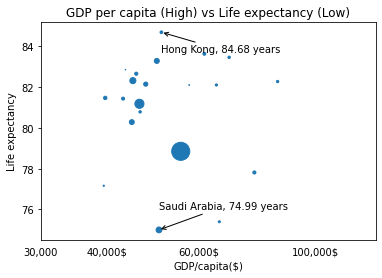

In [36]:
# countries with a life expectancy lower than the mean and a gdp higher than the mean
high_gdp = df_2018[(df_2018['Life expectancy'] < mean_life) & (df_2018['GDP per capita'] > mean_gdp)]

#countries with a gdp higher than one std above the mean
top_countries_gdp = df_2018[df_2018['GDP per capita'] > mean_gdp + std_gdp ]

country_size = top_countries_gdp['Total population (Gapminder, HYDE & UN)']/10**6

fig, ax = plt.subplots()
scatter = ax.scatter(top_countries_gdp['GDP per capita'], top_countries_gdp['Life expectancy'],s = country_size)
ax.set_xscale('log')

ax.set_xlim(30000,130000)

ax.set_xticks([30000,40000,60000,100000])
ax.set_xticklabels(['30,000','40,000$','60,000$','100,000$'])
ax.xaxis.set_ticks_position('none')

ax.set_xlabel(r'GDP/capita($)', fontsize=10)
ax.set_ylabel(r'Life expectancy', fontsize=10)
ax.set_title('GDP per capita (High) vs Life expectancy (Low)')

# Hong Kong
hong = top_countries_gdp[top_countries_gdp['Entity'] == 'Hong Kong']
hong_gdp = hong['GDP per capita']
hong_life = hong['Life expectancy']

# Saudi Arabia
saudi = top_countries_gdp[top_countries_gdp['Entity'] == 'Saudi Arabia']
saudi_gdp = saudi['GDP per capita']
saudi_life = saudi['Life expectancy']


ax.annotate('Hong Kong, 84.68 years',(hong_gdp,hong_life),(hong_gdp,hong_life -1),arrowprops =dict(arrowstyle = '->'))
ax.annotate('Saudi Arabia, 74.99 years',(saudi_gdp,saudi_life),(saudi_gdp,saudi_life +1),arrowprops =dict(arrowstyle = '->'))

plt.show()

,Entity,Code,Year,Life expectancy,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent,life/gdp,plot_category
3110,Australia,AUS,2018,83.281,49830.7993,NaN,24898153.0,NaN,0.139186,1
3347,Austria,AUT,2018,81.434,42988.0709,NaN,8891383.0,NaN,0.154264,1
4115,Bahrain,BHR,2018,77.163,39498.7672,NaN,1569440.0,NaN,0.150742,1
5248,Belgium,BEL,2018,81.468,39756.2031,NaN,11482180.0,NaN,0.166943,1
9029,Canada,CAN,2018,82.315,44868.7435,NaN,37074558.0,NaN,0.151013,1
13622,Denmark,DNK,2018,80.784,46312.3443,NaN,5752131.0,NaN,0.140914,1
19617,Germany,DEU,2018,81.180,46177.6187,NaN,83124413.0,NaN,0.142714,1
22575,Hong Kong,HKG,2018,84.687,50839.3714,NaN,7371728.0,NaN,0.141070,1
23205,Iceland,ISL,2018,82.855,43438.5412,NaN,336712.0,NaN,0.158038,1
24399,Ireland,IRL,2018,82.103,64684.3020,NaN,4818694.0,NaN,0.104212,1


## GDP VS Happiness

In [6]:
df_happiness = pd.read_csv(io.BytesIO(uploaded['gdp-vs-happiness.csv']))

df_happiness.head()

## questions? 
# Does higher incomes mean a higher life satisfaction?
# What is the magnitude of this, i.e is there a certain point where income doesn't affect satisfaction?
# Are there poor countries with a higher life satisfaction than rich countries. If so, why?


,Entity,Code,Year,Life satisfaction in Cantril Ladder (World Happiness Report 2021),"GDP per capita, PPP (constant 2017 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2008,3.724,1484.114461,27722281.0,NaN
2,Afghanistan,AFG,2009,4.402,1758.904477,28394806.0,NaN
3,Afghanistan,AFG,2010,4.758,1957.029070,29185511.0,NaN
4,Afghanistan,AFG,2011,3.832,1904.559926,30117411.0,NaN


### cleaning data

In [7]:
# 2018
df_happiness18 = df_happiness[df_happiness['Year'] == 2018]

df_happiness18.head()

# checking NA's
df_happiness18.count()

df_happiness18.rename(columns = {'Life satisfaction in Cantril Ladder (World Happiness Report 2021)':'Life','GDP per capita, PPP (constant 2017 international $)':'GDP' },inplace = True)

#removing NA's
df_happiness18 = df_happiness18.dropna(subset =['Life','GDP'])

# removing WORLD
df_happiness18 = df_happiness18[df_happiness18['Entity'] !='World']



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Summry statistics and plotting GDP vs LSS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


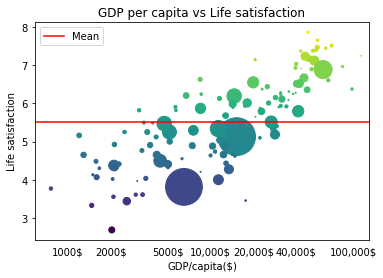

In [8]:

mean_sat = np.mean(df_happiness18['Life'])
mean_gdp = np.mean(df_happiness18['GDP'])
country_size = df_happiness18['Total population (Gapminder, HYDE & UN)']/10**6

x_gdp = [0,150000]
y_life = [mean_sat,mean_sat]

fig, ax = plt.subplots()
scatter = ax.scatter(df_happiness18['GDP'], df_happiness18['Life'],c = df_happiness18['Life'], s = country_size)
ax.set_xscale('log')
ax.plot(x_gdp,y_life,'red',label = 'Mean')
ax.legend(loc = 'upper left')

ax.set_xticks([1000,2000,5000,10000,20000,40000,100000])
ax.set_xticklabels(['1000$','2000$','5000$','10,000$','20,000$','40,000$','100,000$'])
ax.xaxis.set_ticks_position('none')

ax.set_xlabel(r'GDP/capita($)', fontsize=10)
ax.set_ylabel(r'Life satisfaction', fontsize=10)
ax.set_title('GDP per capita vs Life satisfaction')
ax.set_xlim(0,130000)



plt.show()

### Plotting poor and rich countries with similar scores

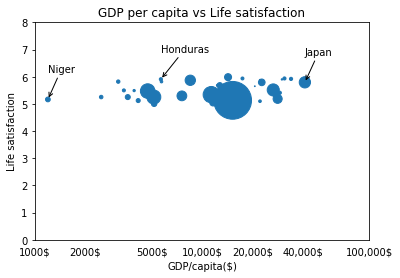

In [9]:
# poor and rich countries with similar life satisfactions
std_sat = np.std(df_happiness18['Life'])


similar_countries = df_happiness18[(df_happiness18['Life'] < 6) & (df_happiness18['Life'] > 5)]
country_size = similar_countries['Total population (Gapminder, HYDE & UN)']/10**6


# Japan
japan = similar_countries[similar_countries['Entity'] == 'Japan']
japan_gdp = japan['GDP']
japan_life = japan['Life']

# Niger
niger = similar_countries[similar_countries['Entity'] == 'Niger']
niger_gdp = niger['GDP']
niger_life = niger['Life']

# Honduras
hond = similar_countries[similar_countries['Entity'] == 'Honduras']
hond_gdp = hond['GDP']
hond_life = hond['Life']

fig, ax = plt.subplots()
scatter = ax.scatter(similar_countries['GDP'], similar_countries['Life'],s = country_size)
ax.set_xscale('log')

ax.annotate('Japan',(japan_gdp,japan_life),(japan_gdp,japan_life + 1),arrowprops =dict(arrowstyle = '->'))
ax.annotate('Niger',(niger_gdp,niger_life),(niger_gdp,niger_life + 1),arrowprops =dict(arrowstyle = '->'))
ax.annotate('Honduras',(hond_gdp,hond_life),(hond_gdp,hond_life + 1),arrowprops =dict(arrowstyle = '->'))

ax.set_xticks([1000,2000,5000,10000,20000,40000,100000])
ax.set_xticklabels(['1000$','2000$','5000$','10,000$','20,000$','40,000$','100,000$'])
ax.xaxis.set_ticks_position('none')

ax.set_ylim(0,8)

ax.set_xlabel(r'GDP/capita($)', fontsize=10)
ax.set_ylabel(r'Life satisfaction', fontsize=10)
ax.set_title('GDP per capita vs Life satisfaction')


plt.show()

In [16]:
mean_sat

5.512913043478263

### Distribution of life satisfaction (All countries)

In [ ]:
### Distribution of life satisfaction
fig, ax = plt.subplots()
ax.hist(df_happiness18['Life'],color = '#0504aa',alpha = 0.7,rwidth = 0.6)
ax.set_xlabel('Life satisfaction')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Life satisfaction')
plt.show() 

### Distribution of life satisfaction (Poor countries)

In [ ]:
#Poor countries

poor_countries = df_happiness18[df_happiness18['GDP'] < mean_gdp]

fig, ax = plt.subplots()
ax.hist(poor_countries['Life'],color = '#0504aa',alpha = 0.7,rwidth = 0.6)
ax.set_xlabel('Life satisfaction')
ax.set_ylabel('Frequency')
ax.set_title('Countries with a GDP lower than the mean')
plt.show() 

### Distribution of life satisfaction (Rich countries)

In [ ]:
# Rich countries

rich_countries = df_happiness18[df_happiness18['GDP'] > mean_gdp]

fig, ax = plt.subplots()
ax.hist(rich_countries['Life'],color = '#0504aa',alpha = 0.7,rwidth = 0.6)
ax.set_xlabel('Life satisfaction')
ax.set_ylabel('Frequency')
ax.set_title('Countries with a GDP higher than the mean')
plt.show() 